TP 2 - Ejercicio 2 - Grupo 3: Florencia Denisse Costa y Guadalupe Sosa Ferro

# Install, importar librerías y montar Drive

In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
import math
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cargar datos

In [27]:
datos = pd.read_excel("/content/reviews_sentiment.xlsx")
# Se cargan los datos del archivo excel utilizando Pandas
# Se guardan en un DataFrame

In [28]:
datos

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


# Preprocesamiento de datos

## Binarizar

Binarizamos la columna *titleSentiment* para luego poder emplearlo como atributo en el algoritmo de KNN. Reemplazamos por un "1" en los casos positivos, por un "0" en los negativos y por NaN cuando el campo se encontraba vacío.

Este mismo procedimiento lo realizamos para *textSentiment* para poder reemplazar los datos "NaN", como se explicará más adelante.

In [29]:
# Binarizar positivos y negativos
def binarizacion(datos, columna): # Binariza una columna del dataset
  for i in range(len(datos)):
    if datos[columna][i] == "positive":
      datos[columna][i] = 1
    elif datos[columna][i] == 'negative':
      datos[columna][i] = 0
    else:
      datos[columna][i] = "NaN"

In [30]:
# Binarizamos titleSentiment
binarizacion(datos, 'titleSentiment')
binarizacion(datos, 'textSentiment') 

<ipython-input-29-917b3ed5be37>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[columna][i] = 0
<ipython-input-29-917b3ed5be37>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[columna][i] = "NaN"
<ipython-input-29-917b3ed5be37>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[columna][i] = 1


In [31]:
datos

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,0,0,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,0,0,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,0,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,0,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,0,0,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,1,1,5,2.814818
253,Buena,Genial,1,1,1,5,2.924393
254,Wuau,Genial,1,1,1,5,2.924393
255,Muy buena,Genial,1,1,1,5,2.924393


## Nan en *titleSentiment*

Para poder reemplazar los valores de NaN nos fijamos si existía alguna relación entre las variables *textSentiment* y *titleSentiment*.

Encontramos que en el 75.88% de los registros ambas variables coincidían.  Por ello decidimos reemplazar los valores de NaN de *titleSentiment* por la puntuación de *textSentiment* correspondiente a un mismo registro.

In [32]:
#Calculamos cuál era el porcentaje de coincidencia entre las variables textSentiment y titleSentiment

cont = 0

for i in range(len(datos)):
  registro = datos.iloc[i]
  titleSentiment = registro.loc["titleSentiment"]
  textSentiment = registro.loc["textSentiment"]
  if titleSentiment == textSentiment:
    cont += 1

porcentaje_coincidencia = round(100*cont/len(datos),2)
print(f"{porcentaje_coincidencia}%")

75.88%


In [33]:
#Reemplazamos los valores de NaN de titleSentiment por la valoración obtenida en textSentiment
for i in range(len(datos)):
  registro = datos.iloc[i]
  titleSentiment = registro.loc["titleSentiment"]
  textSentiment = registro.loc["textSentiment"]
  if titleSentiment == "NaN":
    datos["titleSentiment"][i] = textSentiment

<ipython-input-33-f0c0c5c1154e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["titleSentiment"][i] = textSentiment


In [34]:
datos

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,0,0,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,0,0,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,0,0,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,0,0,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,0,0,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,1,1,5,2.814818
253,Buena,Genial,1,1,1,5,2.924393
254,Wuau,Genial,1,1,1,5,2.924393
255,Muy buena,Genial,1,1,1,5,2.924393


# Ítem a

Calculamos el promedio de palabras cuyo *Star rating* es 1, obteniendo como resultado 12.22 palabras (Caso 1). 
Cabe destacar que a la hora de hacer este cálculo consideramos que la cantidad *wordcount* era la cantidad correcta de palabras y que no coincidía con la cantidad de palabras de la variable *Review text* debido a un problema en la importación. Es decir, que cuando se importaron los comentarios los mismos se cortaron quedando incompletos. Si no tuviesemos en cuanta esto, nos daría un promedio de 8.16 palabras (Caso 2).

## Caso 1

In [35]:
suma_palabras = 0
cont = 0

for i in range(len(datos)): #Recorremos todos los registros
  registro = datos.iloc[i] #Tomamos un registro
  if registro.loc["Star Rating"] == 1: #Si el registro en la columna Star rating es 1
    suma_palabras += registro.loc["wordcount"] #sumamos las palabras del registro
    cont += 1 #sumamos 1 al contador

#Cálculo del promedio
promedio = round(suma_palabras/cont, 2)
print(promedio)

12.22


## Caso 2 (no usamos)

Cálculo de promedio, corrigiendo *wordcount*. Sin embargo, nosotras consideramos que hubo un error de importación por eso no lo tomamos en cuenta. Lo dejamos para la visualización del resultado del ítem a (no correr código porque modifica la variable *wordcount*).

In [25]:
# Comprobar que wordcount == cantidad de palabras en el review text
for i in range(len(datos)):
  registro = datos.iloc[i]
  review = registro.loc["Review Text"]
  len_review = len(review.split()) #Separamos las palabras
  wordcount = registro.loc["wordcount"]

  if wordcount != len_review: #modificamos el wordcount para que coincida con las palabras del review
    datos['wordcount'][i] = len_review
    #registro.loc["wordcount"] = len_review

<ipython-input-25-003c019a578c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['wordcount'][i] = len_review


In [26]:
suma_palabras = 0
cont = 0

for i in range(len(datos)): #Recorremos todos los registros
  registro = datos.iloc[i] #Tomamos un registro
  if registro.loc["Star Rating"] == 1: #Si el registro en la columna Star rating es 1
    suma_palabras += registro.loc["wordcount"] #sumamos las palabras del registro
    cont += 1 #sumamos 1 al contador

#Cálculo del promedio
promedio = round(suma_palabras/cont, 2)
print(promedio)

8.16


# Normalización

Previo a la realización del algoritmo de KNN, nos pareció conveniente normalizar las variables a utilizar como atributos, según corresponda.

La normalización implica escalar los datos de manera que su módulo no supere la unidad. Permite evitar que las variables con valores más grandes dominen el cálculo de las distancias en KNN. A su vez, puede ser necesaria si los datos tienen diferentes unidades de medida o escalas diferentes. La misma se calcula a partir de la siguiente fórmula:

                                                        x_norm = (x - x_min) / (x_max - x_min)

donde:

x_norm es el valor normalizado, x es el valor original de la variable, x_min es el valor mínimo de la variable y x_max es el valor máximo de la variable.

In [36]:
def normalizar(datos, columna): #Normalización de los datos
  max = datos[columna].max()
  min = datos[columna].min()
  for i in range(len(datos)):
    datos[columna][i] = (datos[columna][i] - min)/(max - min)
  return

A la hora de normalizar evaluamos cada uno de los atributos para ver cuál era la opción más adecuada.

* *wordcount*: variable cuantitativa discreta. Toma valores del 1 al 103. Decidimos normalizarla para que así sea una variable cuantitativa continua condición requerida para KNN. Además para que no domine en el cálculo de las distancias.

* *titleSentiment*: categórica. Se refiere a la valoración estimada de un título como positiva o negativa, por lo que se puede considerar como una variable categórica con dos categorías: positiva (asignando un valor de 1) y negativa (asignando un valor de 0). Como sus valores ya se encuentran entre 0 y 1 no tiene sentido normalizarla. 

* *sentimentValue*: cuantitativa continua. Toma valores continuos entre -4 y 4. Decidimos normalizarla para que no domine a la hora de calcular las distancias. 

A modo de resumen decidimos normalizar *wordcount* y *sentimentValue* para garantizar que todas las variables contribuyan de manera equitativa a la distancia y, por lo tanto, a la clasificación.


In [37]:
# Normalizamos las variables wordcount y sentimentValue para que queden todas entre 0 y 1
# textSentiment ya está entre 0 y 1
normalizar(datos, "wordcount")
normalizar(datos, "sentimentValue")

<ipython-input-36-4a2bdaf7b241>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[columna][i] = (datos[columna][i] - min)/(max - min)


In [38]:
datos

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,0.215686,0,0,1,0.323058
1,faltan cosas,Han mejorado la apariencia pero no,0.186275,0,0,1,0.305047
2,Es muy buena lo recomiendo,Andres e puto amoooo,0.029412,0,0,1,0.302150
3,Version antigua,Me gustana mas la version anterior esta es mas...,0.156863,0,0,1,0.299618
4,Esta bien,Sin ser la biblia.... Esta bien,0.049020,0,0,1,0.293209
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,0.019608,1,1,5,0.918831
253,Buena,Genial,0.000000,1,1,5,0.938606
254,Wuau,Genial,0.000000,1,1,5,0.938606
255,Muy buena,Genial,0.000000,1,1,5,0.938606


# Ítem b

Realizamos gráficos de torta para ver cómo era la distribución de las categorías de todos los datos. Observamos que la mayor cantidad de los comentarios tienen 5 estrellas, le siguen los de 3 estrellas, 1 estrella, 4 estrellas y por último 2 estrellas. Consideramos que esto se puede deber a que a la hora de valorar una aplicación,  las personas tendemos a poner el puntaje máximo si nos gustó, el mínimo si no nos gustó o uno intermedio. No es tan común que se coloque una valoración de 4 y menos de 2.

In [39]:
def pieChart(datos, tipo):
  labels = ['1', '2', '3', '4', '5']
  cants = [len(datos.loc[datos["Star Rating"].isin([1])]), 
    len(datos.loc[datos["Star Rating"].isin([2])]),
    len(datos.loc[datos["Star Rating"].isin([3])]),
    len(datos.loc[datos["Star Rating"].isin([4])]),
    len(datos.loc[datos["Star Rating"].isin([5])])]

  plt.figure(figsize=(5,5))
  plt.pie(cants, labels=labels, autopct='%1.1f%%')
  plt.title(f"Distribución de Star Rating en el conjunto {tipo}")
  plt.show()
  return

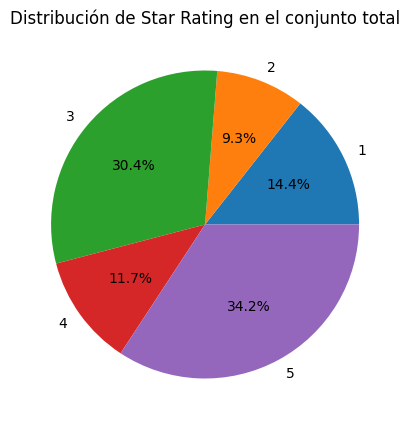

In [40]:
pieChart(datos, tipo = "total")

Previo a la división del *dataset* mezclamos los registro. Luego dividimos en 20% de testeo y 80% de entrenamiento.

In [41]:
datos_1 = datos.sample(frac = 1, random_state = 3).reset_index(drop = True) # Mezclar los datos # Buenos random_states = 2,4,
test_size = 0.2 # Fracción del tamaño del conjunto de prueba
l = int(test_size*len(datos_1))
datos_test = datos_1[:l].reset_index(drop = True)
datos_train = datos_1[l:].reset_index(drop = True)
print(len(datos_test))
print(len(datos_train))

51
206


Visualización de una porción de los datos *train* y *test*.

In [42]:
datos_train[0:3]

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Muy buena,Excelente aplicacion. Muy completa con,0.137255,1,1,4,0.730239
1,Buena,Muy buena están haciendo un buen trabajo,0.058824,1,1,5,0.622687
2,Por fin algo bueno,Esto es lo que hacía falta,0.049020,1,1,3,0.402096


In [43]:
datos_test[0:3]

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Muy bien ..pero,…,0.245098,0,0,1,0.211512
1,Separar las islas!!!,Porfa separen …,0.323529,0,0,2,0.311039
2,jorge,Gracias a los creadores de la app y a las pers...,0.254902,1,1,2,0.475463


Realizamos un gráfico de torta para el conjunto de entrenamiento y el de testeo para ver la distribución de los datos. Se obtuvieron conjuntos con distribuciones representativas al conjunto de datos total.

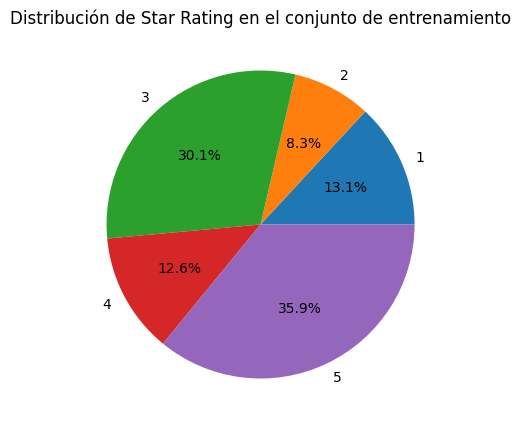

In [44]:
pieChart(datos_train, tipo = "de entrenamiento")

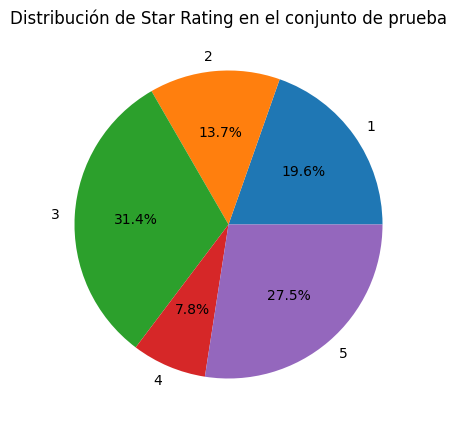

In [45]:
pieChart(datos_test, tipo = "de prueba")

# Ítem c

El método KN-N es un métodos de aprendizaje basado en instancias, trabaja aproximando las funciones objetivo a partir de un nuevo ejemplo. Para ello asume que todas las instancias corresponden a puntos en un espacio en el que se puede medir distancias. Por esta razón realizamos la binarización en el preprocesamiento, para poder emplear la variable *titleSentiment* como atributo.

Se toma un registro a testear y se calcula la distancia de ese registro respecto a todos los de entrenamiento en función de los atributos seleccionados.


Para calcular las distancias utilizamos la distancia Euclídea enfunción *calcularDistancia* siguiendo la siguiente fórmula:

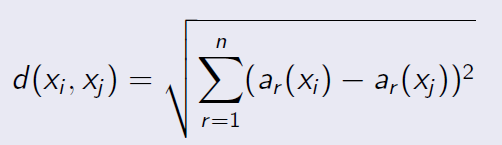

Para el caso en cuestión, teniendo en cuanta los atributos seleccionados se obtiene:

$ d= \sqrt{(wordcount(x_{train})-wordcount(x_{test}))^2 + (titleSentiment(x_{train}) - titleSentiment(x_{test}))^2 + (sentimentValue(x_{train}) - sentimentValue(x_{test}))^2} $

Una vez calculadas las distancias, se guardan en una lista que se anexa como una nueva columna al *dataframe* de entrenamiento. Se ordena el dataframe respecto a las distancias de menor a mayor. Luego, se toman los primeros k registros, siendo k el número de vecinos definido.

Luego se emplea un sistema de votación. Este consiste en fijarse a qué clase pertenecía la instancia de entrenamiento asociada a cada distancia. Se suma 1 a dicha clase. De esta forma, la clase con más votos será la clase a la cual pertenece la instancia de testeo. En el caso de ser multimodal, es decir de que haya varias clases con la mayor cantidad de votos, decidimos colocarles clase 0. Estos casos no los clasificamos.

In [47]:
#Función para calcular distancia Euclídea
def calcularDistancia(registro_train, registro_test):
  dist_wordocunt = (registro_train.loc["wordcount"] - registro_test.loc["wordcount"])**2
  dist_title = (registro_train.loc["titleSentiment"] - registro_test.loc["titleSentiment"])**2
  dist_value = (registro_train.loc["sentimentValue"] - registro_test.loc["sentimentValue"])**2

  suma = dist_wordocunt + dist_title + dist_value
  distancia = math.sqrt(suma)

  return distancia

In [48]:
#Función para predecir clase para KNN no pesado
def predecirClase(df_k_distancias):
  clases = [0]*5

  for i in range(len(df_k_distancias)):
    clase = df_k_distancias["Star Rating"][i]
    clases[clase-1] += 1
    
  moda = st.multimode(clases)

  if len(moda) == 1:
    array_clases = np.array(clases)
    index = np.argmax(array_clases)
    clase_pred = index + 1
  else:
    clase_pred = 0
  
  return clase_pred

In [49]:
#Función donde aplicamos el método K-vecinos más cercanos: recorre registros de testeo y entrenamiento y llama a las funciones de arriba
#para calcular las distancias y predecir las clases en función del tipo de algoritmo elegido
#tipo="normal"--> KNN sin peso
#tipo = 'pesado'-->KNN con peso

def KNN(datos_train, datos_test, k, tipo): 
  
  df_pred = datos_test.drop(["Review Title", "Review Text", "textSentiment"], axis=1)
  clases = []

  for i in range(len(datos_test)):
    distancias = []
    df_distancias = datos_train.drop(["Review Title", "Review Text", "textSentiment"], axis=1)
    registro_test = datos_test.iloc[i]

    for j in range(len(datos_train)):
      registro_train = datos_train.iloc[j]
      distancia = calcularDistancia(registro_train, registro_test)
      distancias.append(distancia)
    
    df_distancias.insert(4, "distancia", distancias)
    df_distancias_ord = df_distancias.sort_values(by="distancia", ignore_index=True)
    df_k_distancias = df_distancias_ord[:k]

    if tipo == "normal":
      clase = predecirClase(df_k_distancias)
    elif tipo == "pesado":
      clase = predecirClaseKNNpesado(df_k_distancias)
    
    clases.append(clase)

  df_pred.insert(3, "Star Rating Predicción", clases)

  return df_pred

Probamos para k=5 como pedía la consigna para KNN sin peso.

In [50]:
k = 5
datos_test_pred_normal = KNN(datos_train, datos_test, k, tipo="normal")

In [51]:
datos_test_pred_normal[0:5]

,wordcount,titleSentiment,Star Rating,Star Rating Predicción,sentimentValue
0,0.245098,0,1,1,0.211512
1,0.323529,0,2,2,0.311039
2,0.254902,1,2,4,0.475463
3,0.058824,1,5,5,0.668023
4,0.009804,1,3,5,0.783744


Observando los primeros 5 registros de prueba, vemos que no clasificó bien 2 de ellos.

## Algoritmo KNN con distancias pesadas

El algoritmo KNN con distancias pesadas es muy similar al anterior, solamente que en este caso en el "sistema de votación" en vez de sumar 1 se suma 1/distancia. Es un refinamiento que consiste en poner un peso a la
contribución de los vecinos más cercanos.

Este algoritmo es robusto frente a datos de entrenamiento con ruido y muy efectivo cuando se dispone de un gran conjunto de datos de entrenamiento. Al tomar el promedio pesado, se suaviza el impacto de un solo punto aislado con ruido en los ejemplos de entrenamiento.

In [54]:
def predecirClaseKNNpesado(df_k_distancias):
  clases = [0]*5

  for i in range(len(df_k_distancias)):
    distancia_2 = df_k_distancias["distancia"][i]**2

    if distancia_2 == 0:
      clase = df_k_distancias["Star Rating"][i]
      clases[clase-1] += 1
      break
    else:
      clase = df_k_distancias["Star Rating"][i]
      clases[clase-1] += 1/distancia_2 #cambio respecto a la función predecirClase de KNN sin peso
    
  moda = st.multimode(clases)

  if len(moda) == 1:
    array_clases = np.array(clases)
    index = np.argmax(array_clases)
    clase_pred = index + 1
  else: #caso de multimoda, no se puede clasificar. Se le asigna clase 0
    clase_pred = 0
  
  return clase_pred

Probamos método de KNN con peso para k=5 como se pidió en la consigna.

In [55]:
k = 5
datos_test_pred_pesado = KNN(datos_train, datos_test, k, tipo="pesado")

In [56]:
datos_test_pred_pesado[:5]

,wordcount,titleSentiment,Star Rating,Star Rating Predicción,sentimentValue
0,0.245098,0,1,1,0.211512
1,0.323529,0,2,2,0.311039
2,0.254902,1,2,0,0.475463
3,0.058824,1,5,5,0.668023
4,0.009804,1,3,5,0.783744


Visualización de los primeros 5 registros de testeo. Vemos dos errores de clasificación al igual que en el caso anterior, sin embargo esta es una pequeña porción del conjunto por lo cual no es un método válido para evaluar el modelo.

# Ítem d

En este ítem vamos a evaluar los algoritmos respecto a su presición y realizando la matriz de confusión.

## Precisión

### Precisión por categoría

Para calcular la precisión empleamos la fórmula vista en clase: 

Presición = VP/ (VP + FP) 

Lo calculamos para cada categoría.

In [59]:
def comparacionClasificacion(df_test):

  categorias_datos = list(df_test["Star Rating"]) # Ratings reales

  clasificacion_datos = list(df_test["Star Rating Predicción"]) # Ratings predichos 
  
  # Se crea un diccionario de diccionarios, donde cada clave es una categoria y su valor es un diccionario 
  # total es la cantidad de registros que realmente corresponden a dicha categoria.
  P_N_categorias = {
        '1': {'VP': 0, 'VN': 0, 'FP': 0, 'FN': 0, 'total': 0}, 
        '2': {'VP': 0, 'VN': 0, 'FP': 0, 'FN': 0, 'total': 0},
        '3': {'VP': 0, 'VN': 0, 'FP': 0, 'FN': 0, 'total': 0},
        '4': {'VP': 0, 'VN': 0, 'FP': 0, 'FN': 0, 'total': 0},
        '5': {'VP': 0, 'VN': 0, 'FP': 0, 'FN': 0, 'total': 0},
    }

  for categoria in range(1,6): # Para cada categoria de las analizadas

    # Calcular VP --> clasificacion (predicho) == categoria (real) 
    VP = 0
    for i in range(len(categorias_datos)):
      if ((categoria == categorias_datos[i]) and (clasificacion_datos[i] == categorias_datos[i])):
        # El dato se guarda si se cumple que es VP y ademas si la categoria que se está analizando es igual a la del registro
        VP += 1
    diccionario_categoria = P_N_categorias[str(categoria)] 
    diccionario_categoria["VP"] = VP # Se guarda en el diccionario de la categoria la cantidad de VP contados en el DF de entrenamiento

    # Calcular FP --> aquellos registros que fueron clasificados en la categoria analizada pero en realidad no pertenecen a ella 
    FP = 0
    for i in range(len(categorias_datos)):
      if  ((clasificacion_datos[i] == categoria) and (categorias_datos[i] != categoria)):
        # Se suma uno a la cantidad de FP si la clasificacion del registro es igual a la categoria analizada
        # y si la categoria real del registro es distinta a la categoria analizada
        FP += 1
    diccionario_categoria = P_N_categorias[str(categoria)]
    diccionario_categoria["FP"] = FP

    # Calcular VN --> aquellos registros cuya categoria real es distinta a la analizada y que fueron clasificados con la categoria distinta a la analizada (ya sea correctamente o no)
    VN = 0
    for i in range(len(categorias_datos)):
      if (((categoria != categorias_datos[i]) and (clasificacion_datos[i] != categorias_datos[i]) and (categoria != clasificacion_datos[i])) or ((categoria != clasificacion_datos[i]) and (clasificacion_datos[i] == categorias_datos[i]))):
        # Se suma uno si la categoria analizada es distinta a la categoria real del registro y si la clasificacion es distinta a la categoria real
        # y si además la categoria analizada es distinta a la clasificacion del registro.
        # O puede ocurrir que la categoria analizada sea distinta a la categoria real del titural y se clasificó correctamente
        VN += 1
    diccionario_categoria = P_N_categorias[str(categoria)]
    diccionario_categoria["VN"] = VN

    # Calcular FN --> aquellos registros cuya categoria real es igual a la analizada pero fueron incorrectamente clasificados
    FN = 0
    for i in range(len(categorias_datos)):
      if (categorias_datos[i] == categoria) and (clasificacion_datos[i] != categorias_datos[i]):
        # Se suma uno si la categoria real del registro es igual a la analizada y si la clasificacion es distinta a la categoria real
        FN += 1
    diccionario_categoria = P_N_categorias[str(categoria)]
    diccionario_categoria["FN"] = FN

    # Calcular total --> se suman todos los registros cuya categoria real es igual a la analizada
    total = 0 
    for i in range(len(categorias_datos)):
      if (categorias_datos[i] == categoria): 
        total += 1
    diccionario_categoria = P_N_categorias[str(categoria)]
    diccionario_categoria["total"] = total

  return P_N_categorias

In [60]:
def metricas(dict_V_o_F):
   
  # Diccionario donde cada categoria tiene un diccionario con sus metricas
  metricas_categorias = {
        '1': {'accuracy': 0, 'precision': 0, 'F1_score': 0, 'TVP': 0, 'TFP': 0},
        '2': {'accuracy': 0, 'precision': 0, 'F1_score': 0, 'TVP': 0, 'TFP': 0},
        '3': {'accuracy': 0, 'precision': 0, 'F1_score': 0, 'TVP': 0, 'TFP': 0},
        '4': {'accuracy': 0, 'precision': 0, 'F1_score': 0, 'TVP': 0, 'TFP': 0},
        '5': {'accuracy': 0, 'precision': 0, 'F1_score': 0, 'TVP': 0, 'TFP': 0},
    }

  # Utiliza como datos el diccionario previamente obtenido con los VP, FP, VN, FN
  for categoria in range(1,6): 
    VP = dict_V_o_F[str(categoria)]['VP']
    FN = dict_V_o_F[str(categoria)]['FN']
    FP = dict_V_o_F[str(categoria)]['FP']
    VN = dict_V_o_F[str(categoria)]['VN']

    # Calcular accuracy
    accuracy = (VP+VN)/(VP+VN+FN+FP)
    metricas_categorias[str(categoria)]['accuracy'] = accuracy

    # Calcular precision
    if VP == 0:
      precision = 0
    else:
      precision = VP/(VP+FP)
    metricas_categorias[str(categoria)]['precision'] = precision

    # Calcular TVP
    if VP == 0:
      TVP = 0
    else:
      TVP = VP/(VP+FN)
    metricas_categorias[str(categoria)]['TVP'] = TVP

    # Calcular F1-score
    if precision != 0 and TVP != 0:
      F1_score = (2*precision*TVP)/(precision+TVP)
    else:
      F1_score = 0
    metricas_categorias[str(categoria)]['F1_score'] = F1_score

    # Calcular TFP
    if FP == 0:
      TFP = 0
    else:
      TFP = FP/(FP+VN)
    metricas_categorias[str(categoria)]['TFP'] = TFP

  # Graficos

  # Convertimos el diccionario a un dataframe para realizar el grafico de barras multiples
  
  df_metricas_categorias = pd.DataFrame([key for key in metricas_categorias.keys()], columns=['Categorías'])
  #df_metricas_categorias['Accuracy'] = [value['accuracy'] for value in metricas_categorias.values()]
  df_metricas_categorias['Precisión'] = [value['precision'] for value in metricas_categorias.values()]
  #df_metricas_categorias['TVP'] = [value['TVP'] for value in metricas_categorias.values()]
  #df_metricas_categorias['F1_score'] = [value['F1_score'] for value in metricas_categorias.values()]
  #df_metricas_categorias['TFP'] = [value['TFP'] for value in metricas_categorias.values()]
  # Grafico realizado con función de Pandas (utiliza el DF)
  #["Accuracy","Precision","TVP","F1_score","TFP"]
  df_metricas_categorias.plot(x="Categorías", y="Precisión", kind="bar",figsize=(4,4),title="Métricas",ylim=(0, 1.1)) 

  return metricas_categorias

#### KNN sin peso

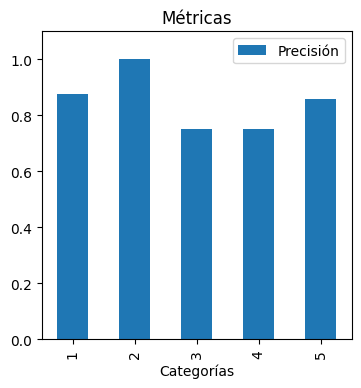

In [61]:
P_N_categorias_normal = comparacionClasificacion(datos_test_pred_normal)
metricas_categorias_normal = metricas(P_N_categorias_normal)

In [62]:
P_N_categorias_normal

{'1': {'VP': 7, 'VN': 40, 'FP': 1, 'FN': 3, 'total': 10},
 '2': {'VP': 4, 'VN': 44, 'FP': 0, 'FN': 3, 'total': 7},
 '3': {'VP': 12, 'VN': 31, 'FP': 4, 'FN': 4, 'total': 16},
 '4': {'VP': 3, 'VN': 46, 'FP': 1, 'FN': 1, 'total': 4},
 '5': {'VP': 12, 'VN': 35, 'FP': 2, 'FN': 2, 'total': 14}}

#### KNN con distancias pesadas

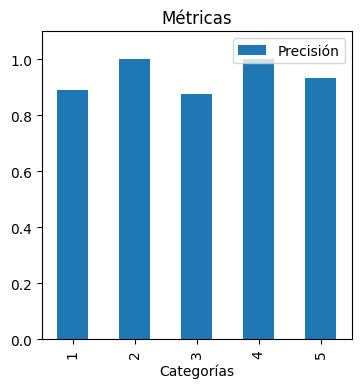

In [63]:
P_N_categorias_pesado = comparacionClasificacion(datos_test_pred_pesado)
metricas_categorias_pesado = metricas(P_N_categorias_pesado)

In [64]:
P_N_categorias_pesado

{'1': {'VP': 8, 'VN': 40, 'FP': 1, 'FN': 2, 'total': 10},
 '2': {'VP': 4, 'VN': 44, 'FP': 0, 'FN': 3, 'total': 7},
 '3': {'VP': 14, 'VN': 33, 'FP': 2, 'FN': 2, 'total': 16},
 '4': {'VP': 4, 'VN': 47, 'FP': 0, 'FN': 0, 'total': 4},
 '5': {'VP': 14, 'VN': 36, 'FP': 1, 'FN': 0, 'total': 14}}

### Precisión del clasificador

Para calcular la precisión del clasificador, utilizamos la siguiente fórmula teniendo en cuanta todas las clases se *Star rating*: 

Precisión = VP / ( VP + FP)


In [65]:
def precisionClasificador(P_N_categorias):
  VP_total = 0
  VN_total = 0
  FP_total = 0
  FN_total = 0

  for clase in P_N_categorias:
    for metrica in P_N_categorias[clase]:
      if metrica == 'VP':
        VP_total += P_N_categorias[clase][metrica]
      elif metrica == 'VN':
        VN_total += P_N_categorias[clase][metrica]
      elif metrica == 'FP':
        FP_total += P_N_categorias[clase][metrica]
      elif metrica == 'FN':
        FN_total += P_N_categorias[clase][metrica]
  
  #accuracy = (VP_total + VN_total) / (VP_total + VN_total + FP_total + FN_total)
  precision = VP_total / (VP_total + FP_total)
  #recall = VP_total / (VP_total + FN_total)
  #metricas = [accuracy, precision, recall]

  return precision

#### KNN normal

In [66]:
metricas_clasificador_normal = precisionClasificador(P_N_categorias_normal)
print(f"La precisión del clasificador KNN normal es: {round(metricas_clasificador_normal,3)}")

La precisión del clasificador KNN normal es: 0.826


#### KNN con distancias pesadas

In [67]:
metricas_clasificador_pesado = precisionClasificador(P_N_categorias_pesado)
print(f"La precisión del clasificador KNN pesado es: {round(metricas_clasificador_pesado,3)}")

La precisión del clasificador KNN pesado es: 0.917


Se obtiene una mejor precisión del clasificador para el caso de KNN pesado.

## Matriz de confusión

Calculamos las matrices de confusión para k=5 para KNN sin peso y con peso.

In [68]:
def calcularMatrizConfusion(datos_test_pred, tipo):

  metricas_categorias = { 
        '1': {'11': 0, '12': 0, '13': 0, '14': 0, '15': 0},
        '2': {'21': 0, '22': 0, '23': 0, '24': 0, '25': 0},
        '3': {'31': 0, '32': 0, '33': 0, '34': 0, '35': 0},
        '4': {'41': 0, '42': 0, '43': 0, '44': 0, '45': 0},
        '5': {'51': 0, '52': 0, '53': 0, '54': 0, '55': 0},
    } 

  for i in range(len(datos_test_pred)):
    # Obtiene el codigo --> la posición en la matriz
    if datos_test_pred["Star Rating Predicción"][i] != 0:
      codigo =  str(datos_test_pred["Star Rating"][i]) + str(datos_test_pred["Star Rating Predicción"][i])
      metricas_categorias[str(datos_test_pred["Star Rating"][i])][codigo] += 1
  
  matriz_confusion = np.zeros((5,5))

  for i in range(1,6):
    for j in range(1,6):
      codigo = str(i) + str(j)
      matriz_confusion[i-1, j-1] = metricas_categorias[str(i)][codigo]

  epsilon =  1e-9
  matriz_confusion_n = np.round(matriz_confusion.astype('float') / (matriz_confusion.sum(axis=1)[:, np.newaxis]+ epsilon), decimals = 3)

  plt.figure()
  # Graficar matriz como heatmap para que quede con los colores 
  sns.heatmap(matriz_confusion_n, annot=True, fmt='g', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'], cmap="crest")
  plt.title(f"Matriz de confusión {tipo}")
  plt.xlabel("Predicciones")
  plt.ylabel("Verdaderas")
  plt.show()

  return

Obtenemos la matriz de confusión para k=5 sin peso.

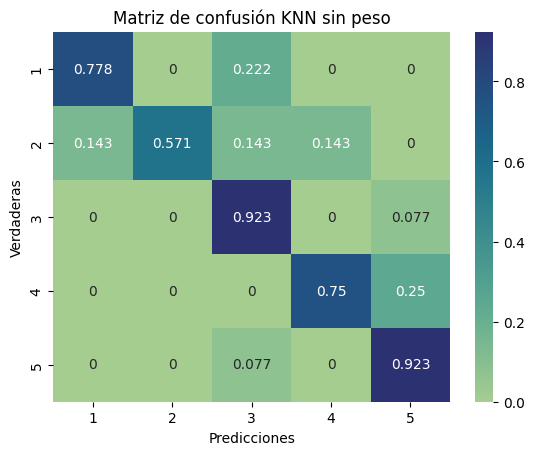

In [69]:
calcularMatrizConfusion(datos_test_pred_normal, "KNN sin peso")

Obtenemos la matriz de confusión para k=5 con peso.

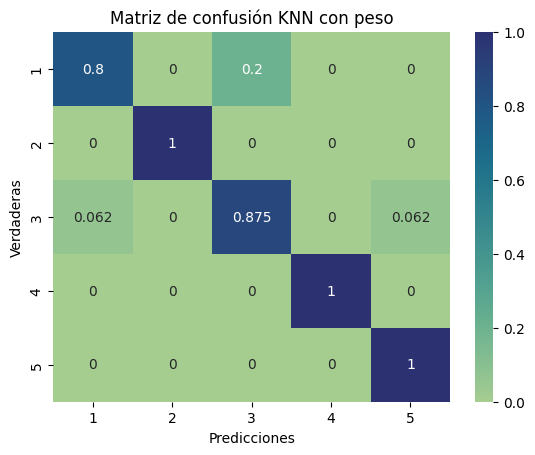

In [70]:
calcularMatrizConfusion(datos_test_pred_pesado, "KNN con peso")

Con KNN con peso para k=5 se obtiene una mejor clasificación de todas las clases, excepto para la clase 3.

# Con distintos valores de k

## KNN sin peso

La precisión del clasificador KNN normal con K = 5 es: 0.826


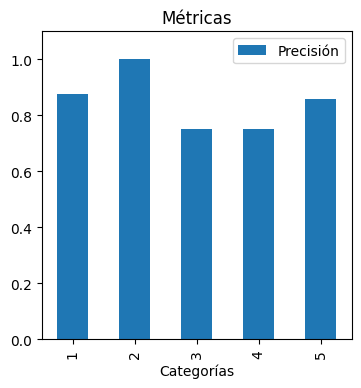

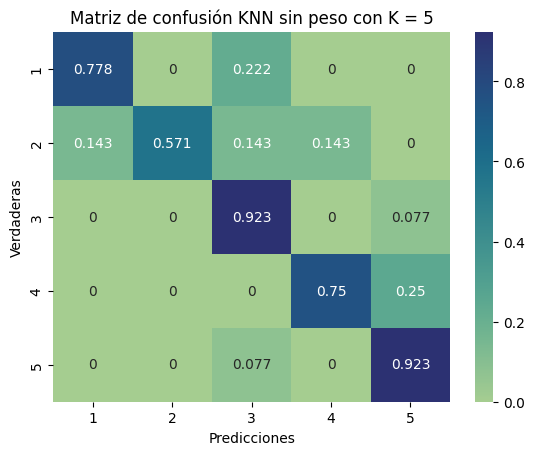

La precisión del clasificador KNN normal con K = 10 es: 0.83


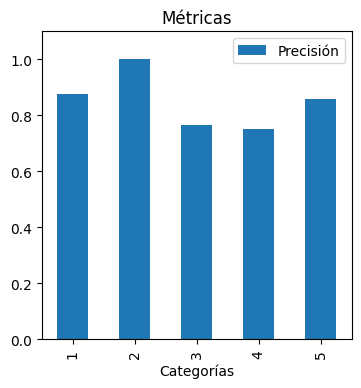

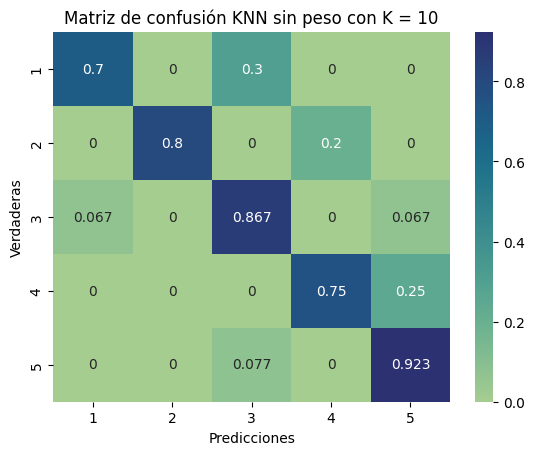

La precisión del clasificador KNN normal con K = 15 es: 0.732


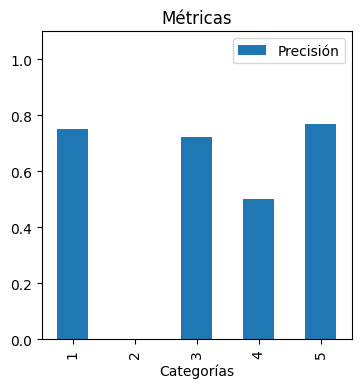

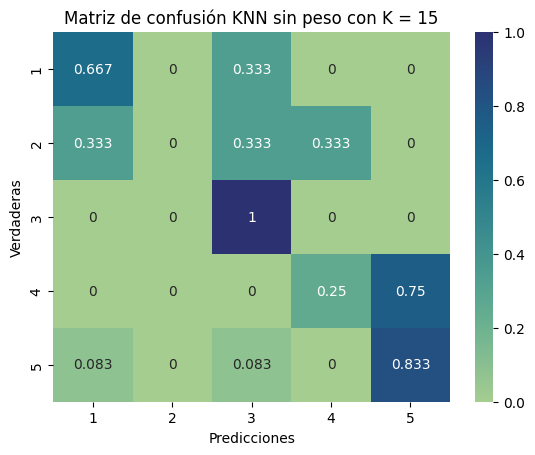

La precisión del clasificador KNN normal con K = 20 es: 0.722


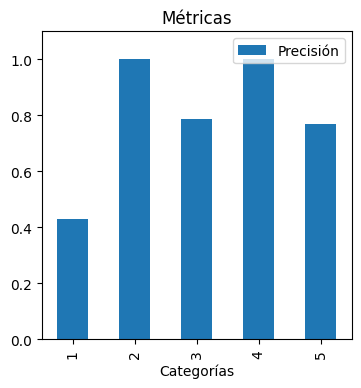

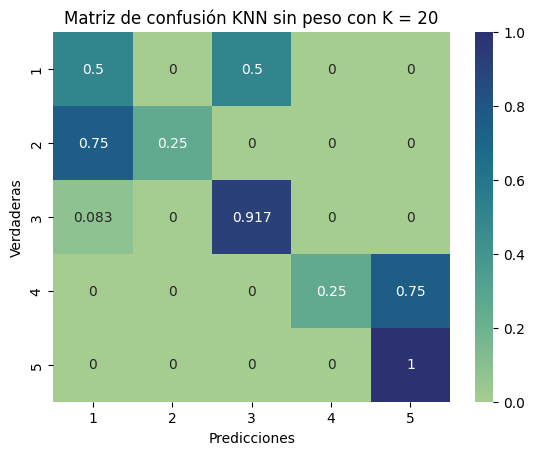

La precisión del clasificador KNN normal con K = 30 es: 0.714


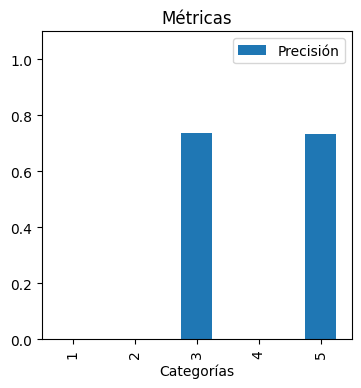

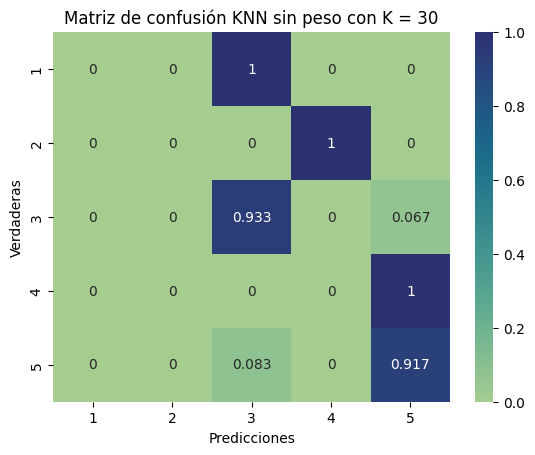

La precisión del clasificador KNN normal con K = 50 es: 0.697


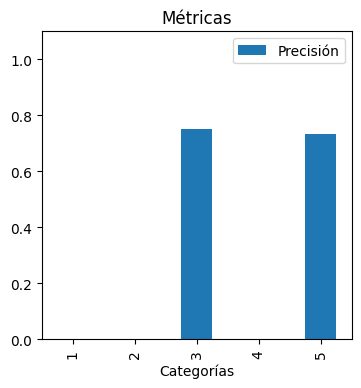

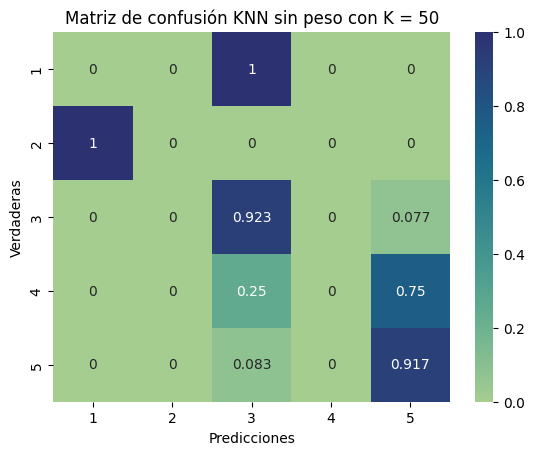

In [71]:
valores_k = [5, 10, 15, 20, 30, 50]

for k in valores_k:
  # KNN sin peso
  datos_test_pred_normal = KNN(datos_train, datos_test, k, tipo="normal")
  # Precision por categoria
  P_N_categorias_normal = comparacionClasificacion(datos_test_pred_normal)
  metricas_categorias_normal = metricas(P_N_categorias_normal)
  # Precision del clasificador
  metricas_clasificador_normal = precisionClasificador(P_N_categorias_normal)
  print(f"La precisión del clasificador KNN normal con K = {k} es: {round(metricas_clasificador_normal,3)}")
  # Matriz de confusión
  calcularMatrizConfusion(datos_test_pred_normal, f"KNN sin peso con K = {k}")

## KNN con distancias pesadas

La precisión del clasificador KNN pesado con K = 5 es: 0.917


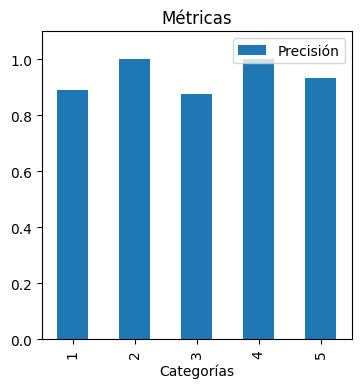

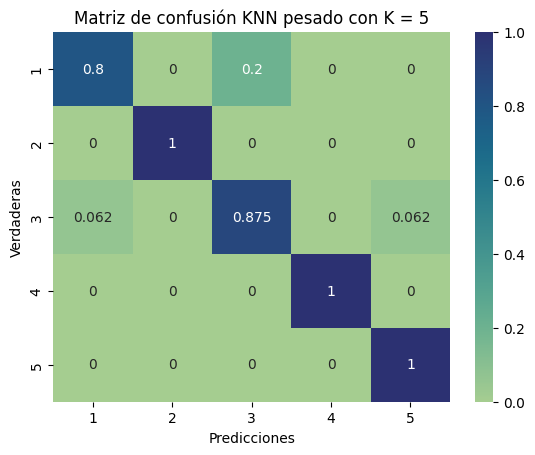

La precisión del clasificador KNN pesado con K = 10 es: 0.933


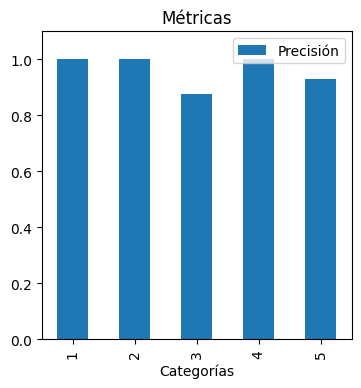

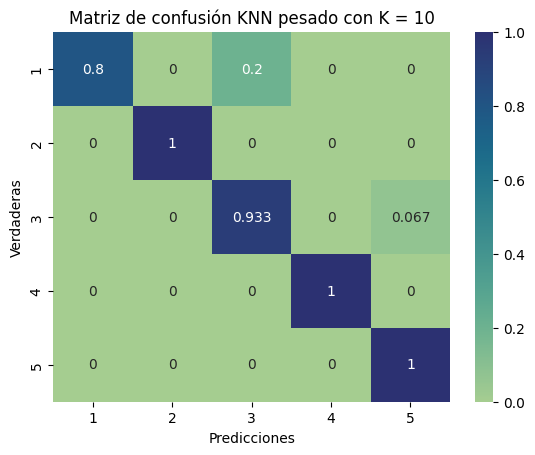

La precisión del clasificador KNN pesado con K = 15 es: 0.923


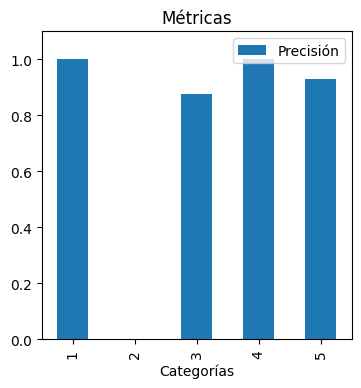

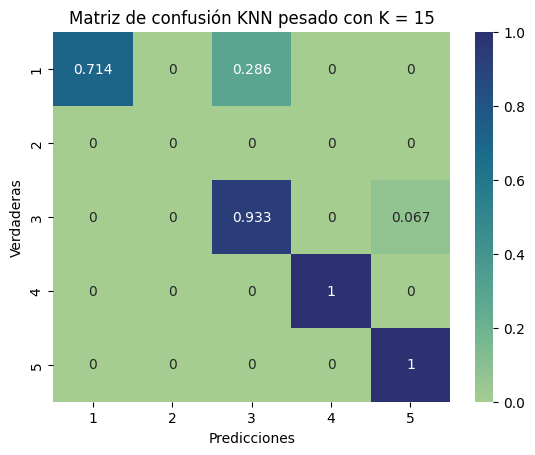

La precisión del clasificador KNN pesado con K = 20 es: 0.886


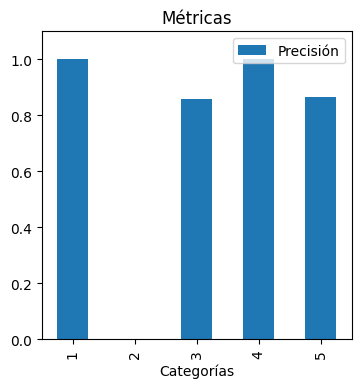

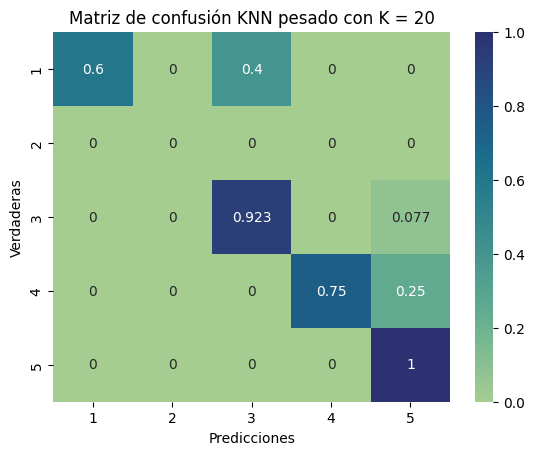

La precisión del clasificador KNN pesado con K = 30 es: 0.875


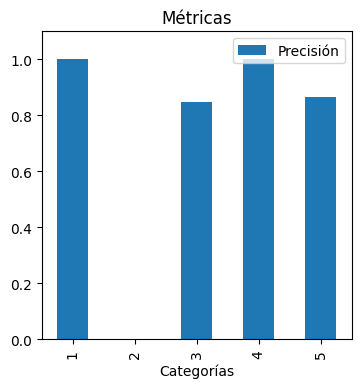

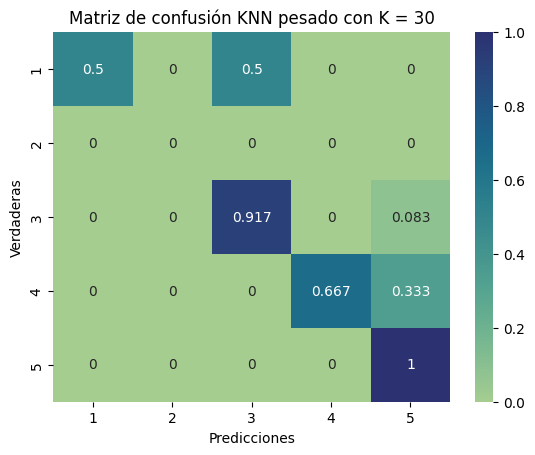

La precisión del clasificador KNN pesado con K = 50 es: 0.833


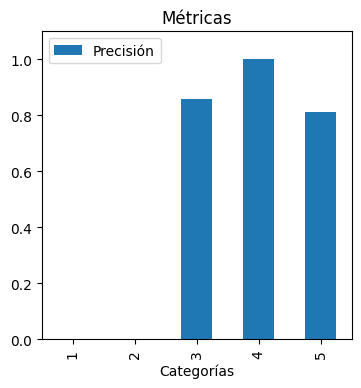

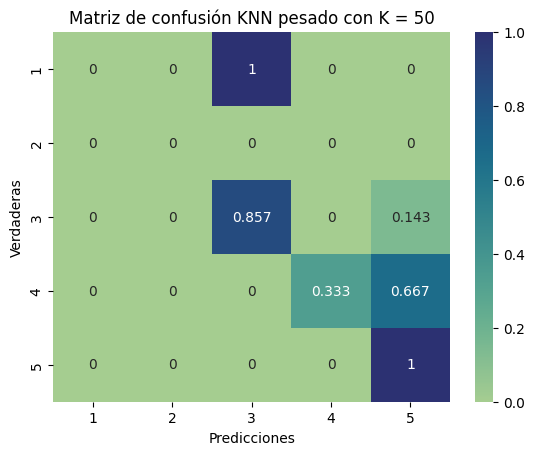

In [72]:
valores_k = [5, 10, 15, 20, 30, 50]

for k in valores_k:
  # KNN con peso
  datos_test_pred_pesado = KNN(datos_train, datos_test, k, tipo="pesado")
  # Precision por categoria
  P_N_categorias_pesado = comparacionClasificacion(datos_test_pred_pesado)
  metricas_categorias_pesado = metricas(P_N_categorias_pesado)
  # Precision del clasificador
  metricas_clasificador_pesado = precisionClasificador(P_N_categorias_pesado)
  print(f"La precisión del clasificador KNN pesado con K = {k} es: {round(metricas_clasificador_pesado,3)}")
  # Matriz de confusión
  calcularMatrizConfusion(datos_test_pred_pesado, f"KNN pesado con K = {k}")

# Conclusiones

* Mejor precisión → clasificador KNN pesado

* Para k=10 → mejor precisión de clasificador y mejores resultados en matriz de confusión

* En general, el peso mejora la clasificación (matriz de confusión)

* k >=15 
  * KNN sin peso: no puede clasificar bien clase 2 
  * KNN con peso: no puede clasificar la clase 2 (multimoda) 

* La clase 2 es la que tiene la menor cantidad de datos → peor clasificación

* A diferencia del ejercicio 1, en este casi todos los cálculos se realizan en el momento de clasificar y no en el momento del entrenamiento.
